# SVM  Assignment-2 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('SalaryData_Train(1).csv')
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
##--EDA----
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
df.shape

(30161, 14)

In [7]:
list(df)

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native',
 'Salary']

In [8]:
svm2= ['age', 'workclass', 'education', 'educationno', 'maritalstatus', 'occupation',
      'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'native', 'Salary']


In [9]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
# Separating numerical and categorical columns from hp
numerical_svm2 = [col for col in svm2 if col in numerical_columns]
categorical_svm2 = [col for col in svm2 if col in categorical_columns]


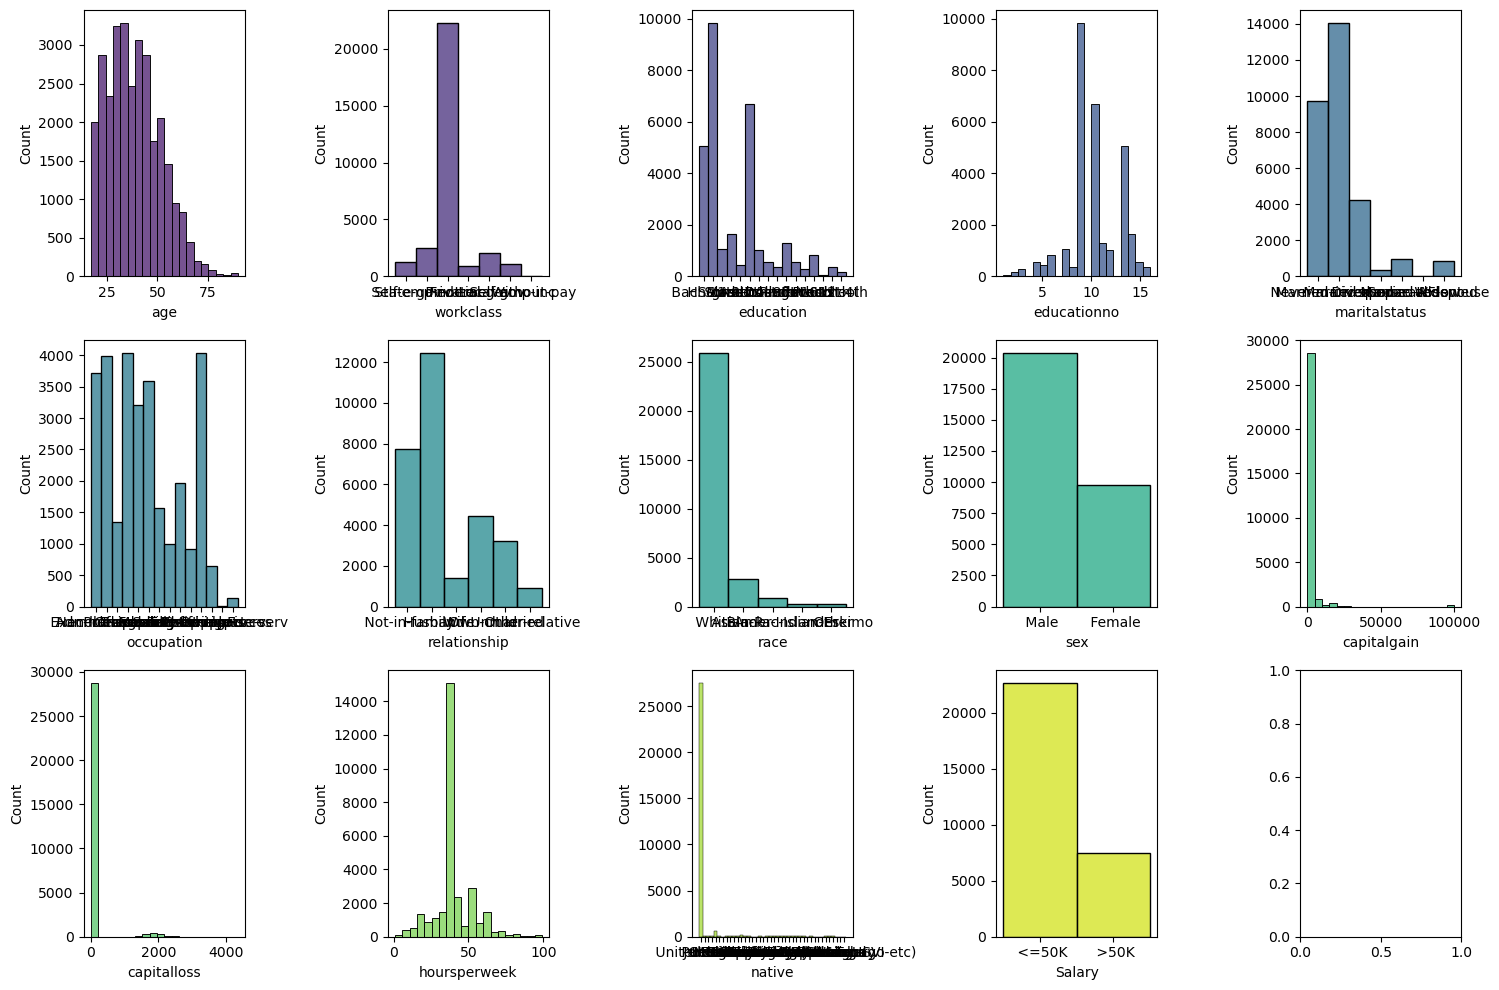

In [10]:
##--Histogram--
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10))
svm = ['age', 'workclass', 'education', 'educationno', 'maritalstatus', 'occupation',
      'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'native', 'Salary']
colors = sns.color_palette('viridis', n_colors=len(svm))
for i, (variable, color) in enumerate(zip(svm, colors)):
    sns.histplot(data=df, x=variable, ax=axes[i // 5, i % 5], color=color, bins=20)
plt.tight_layout()
plt.show()

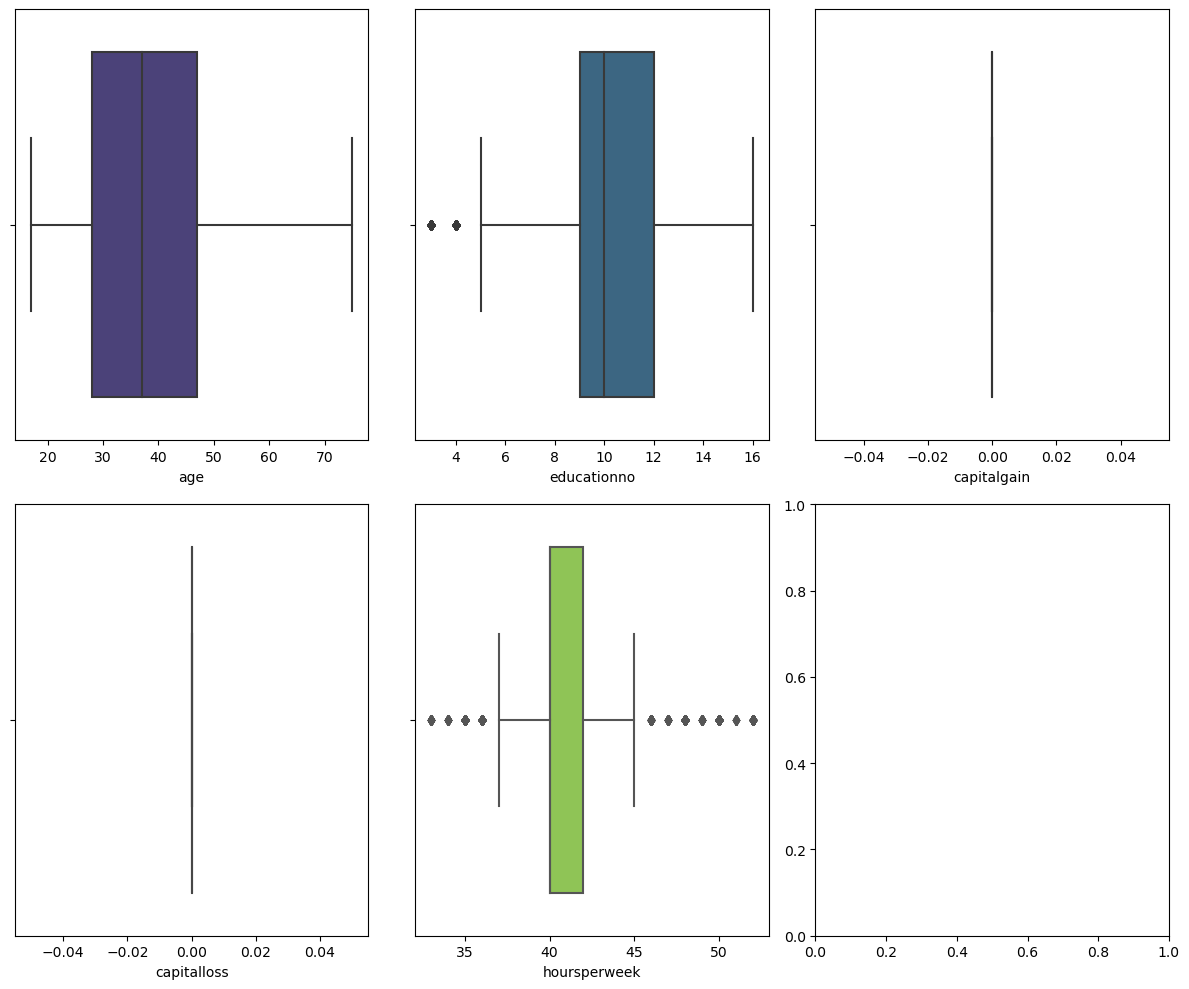

In [12]:
##--OUT liers detection---
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
svo = ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek'] 
colors = sns.color_palette('viridis', n_colors=len(svo))
for i, (variable, color) in enumerate(zip(svo, colors)):
    sns.boxplot(data=df, x=variable, ax=axes[i // 3, i % 3], color=color)
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[variable] < lower_bound) | (df[variable] > upper_bound)
    df = df[~outliers]
plt.tight_layout()
plt.show()

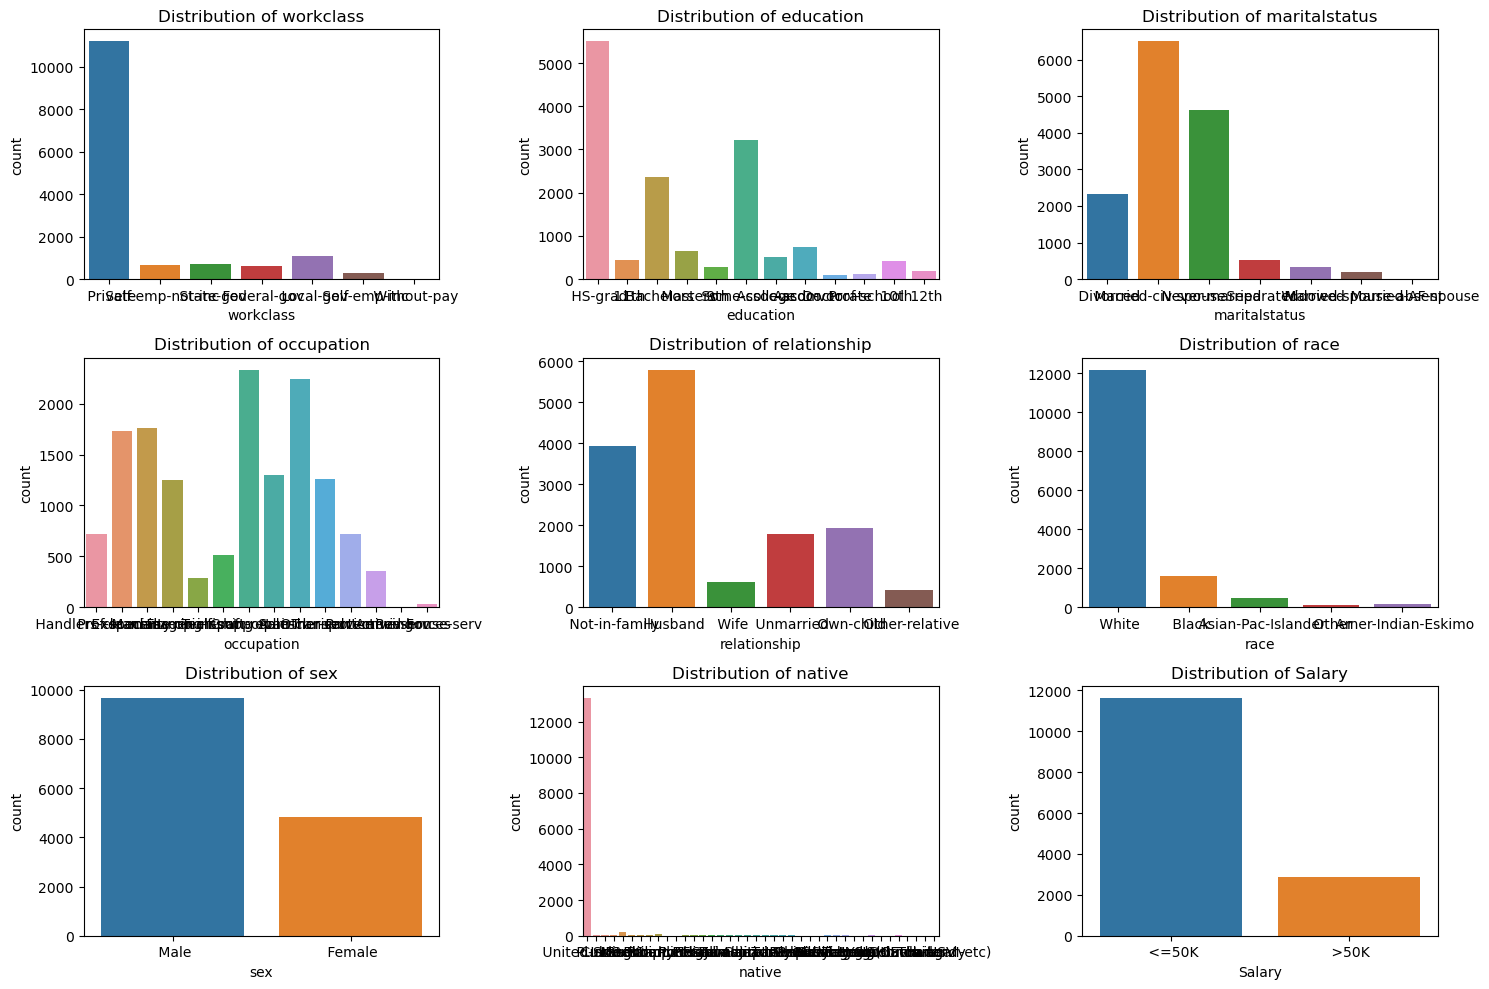

In [13]:
###---Bar plot ---###
categorical_variables = ['workclass', 'education', 'maritalstatus', 'occupation',
                         'relationship', 'race', 'sex', 'native', 'Salary']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
for i, variable in enumerate(categorical_variables):
    row, col = i // 3, i % 3
    sns.countplot(data=df, x=variable, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {variable}')

plt.tight_layout()
plt.show()

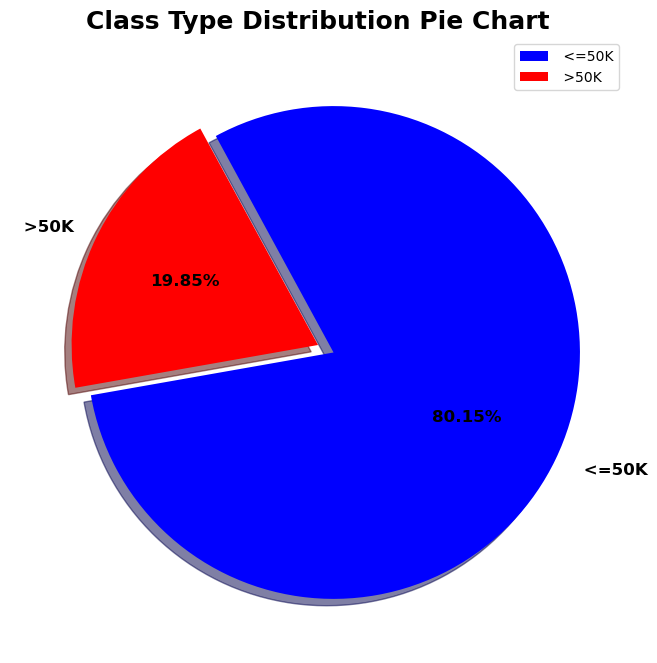

In [14]:
### PIE Chart---
plt.figure(figsize=(12, 8))
plt.pie(df['Salary'].value_counts(),
        labels=df.Salary.unique(),
        explode=[0.07, 0.0],
        autopct='%.2f%%',
        colors=["blue", "red"],
        shadow=True,
        startangle=190,
        textprops={'size': 'large', 'fontweight': 'bold', 'color': 'black'})
plt.legend(loc='upper right')
plt.title("Class Type Distribution Pie Chart", fontsize=18, fontweight='bold')
plt.show()

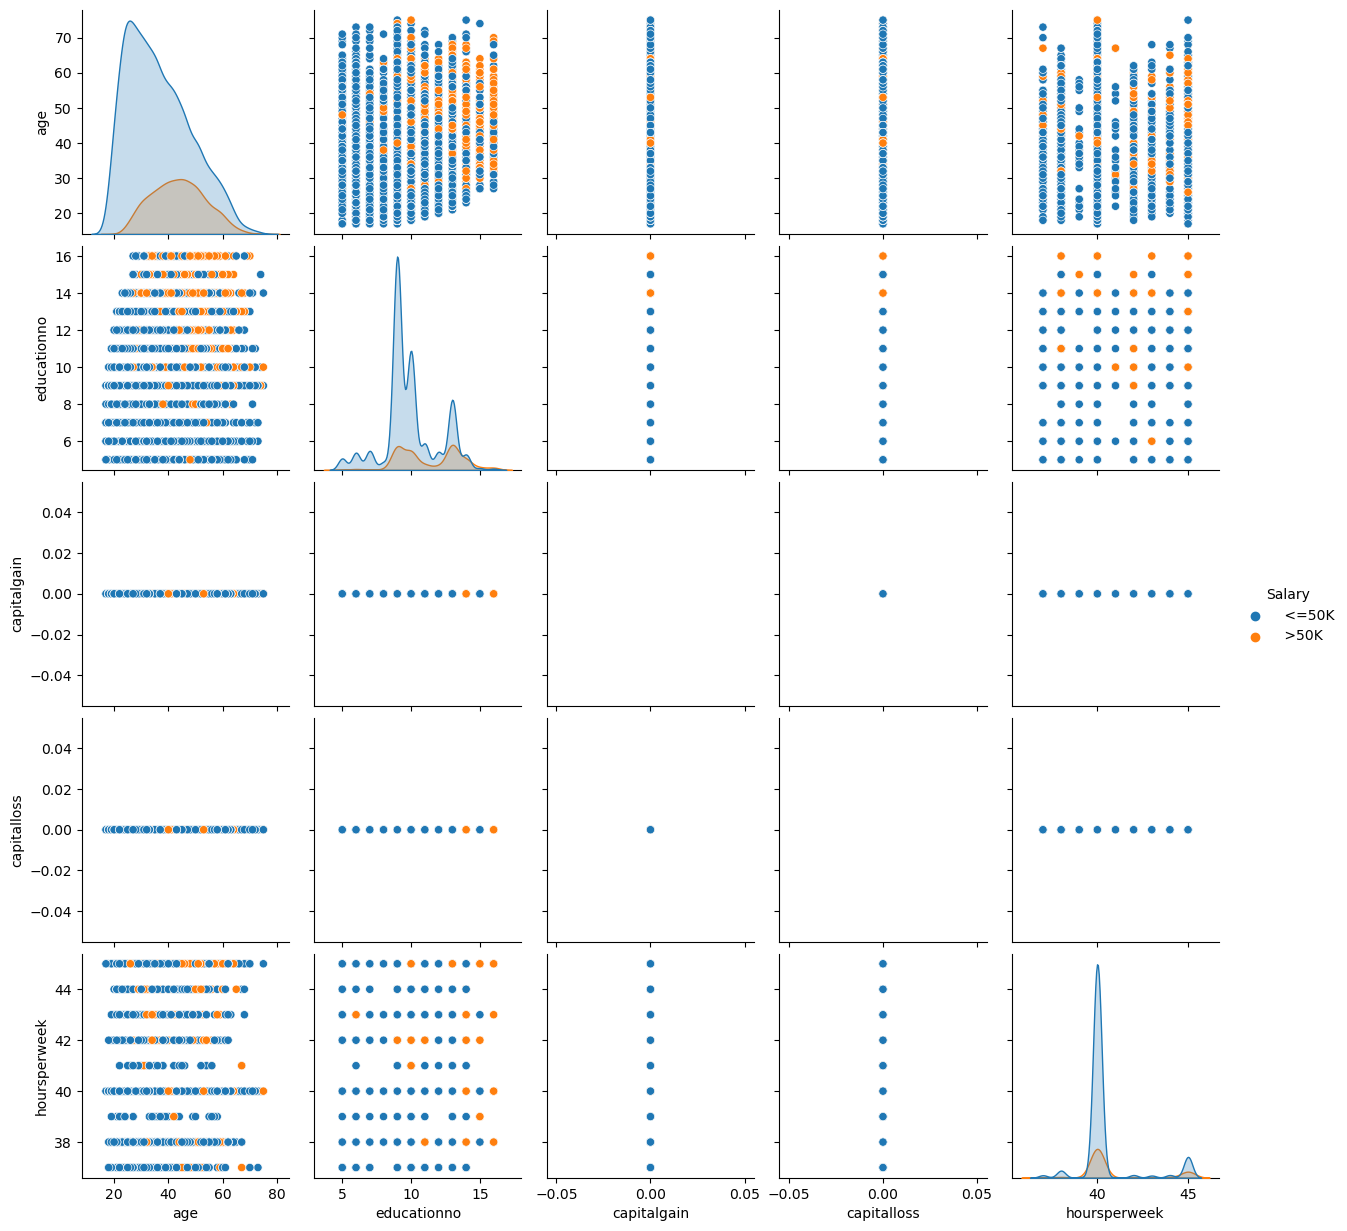

In [15]:
###---Pair-plot---###
sns.pairplot(df,hue='Salary')
plt.show()

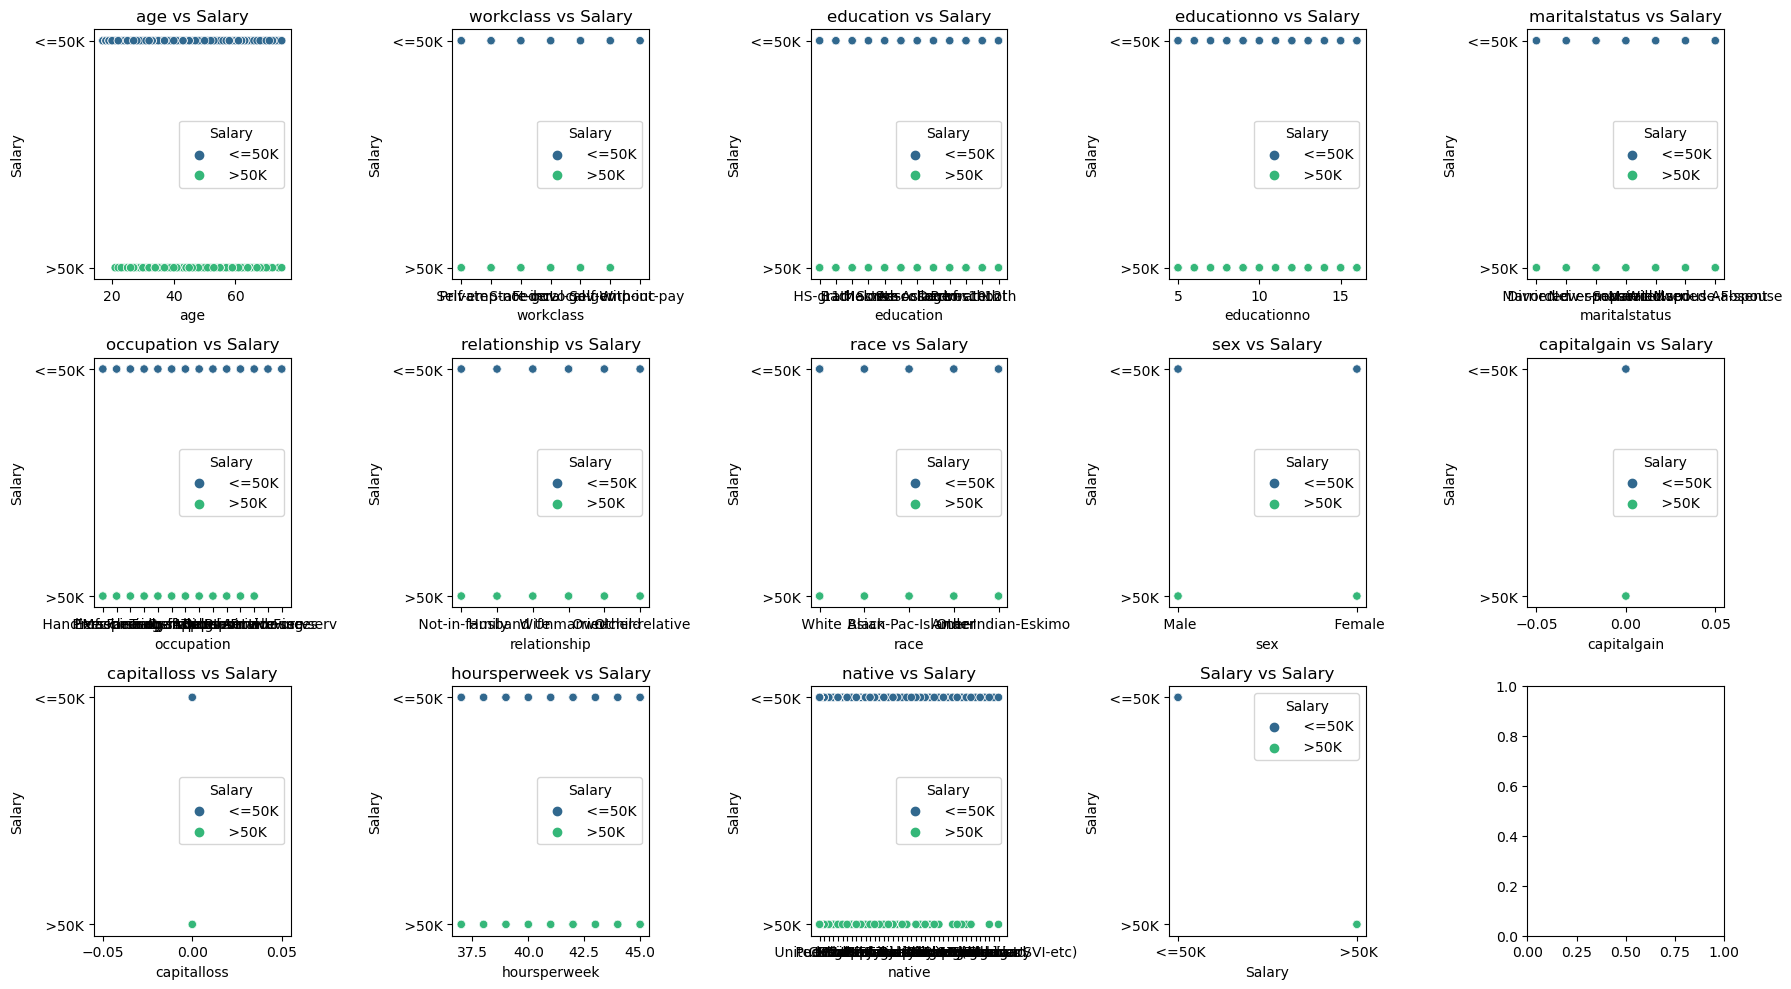

In [16]:
###---Scatter plot---
df = pd.DataFrame(df)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(18, 10))
axes = axes.flatten()
colors = sns.color_palette('viridis', n_colors=len(df['Salary'].unique()))
for i, variable in enumerate(svm):
    sns.scatterplot(data=df, x=variable, y='Salary', ax=axes[i], hue='Salary', palette=colors)
    axes[i].set_title(f'{variable} vs Salary')
plt.tight_layout()
plt.show()

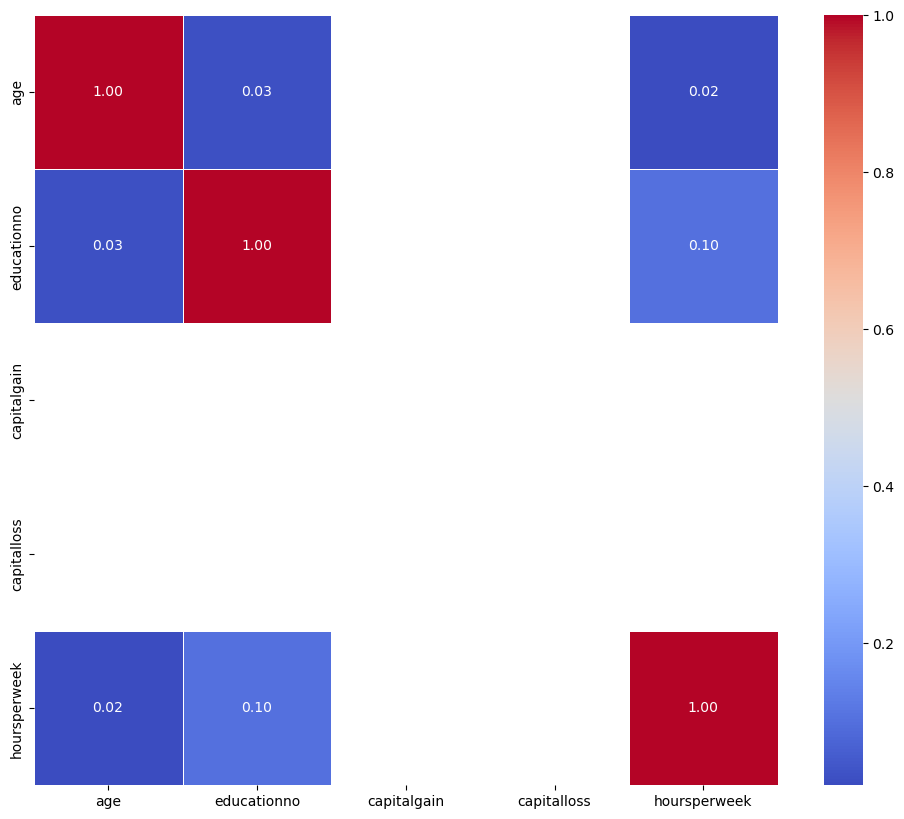

In [19]:
##-- Heat map--
##-- Heat map--
df = df.fillna(0)
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()


In [20]:
###---Label encoding--
Le=LabelEncoder()
df['Salary'] = Le.fit_transform(df['Salary'])
df['workclass']=Le.fit_transform(df['workclass'])
df['education']=Le.fit_transform(df['education'])
df['maritalstatus']=Le.fit_transform(df['maritalstatus'])
df['occupation']=Le.fit_transform(df['occupation'])
df['relationship']=Le.fit_transform(df['relationship'])
df['race']=Le.fit_transform(df['race'])
df['sex']=Le.fit_transform(df['sex'])
df['native']=Le.fit_transform(df['native'])

In [21]:
###--X-&-Y---###
y=df['Salary']
x=df.iloc[:,0:13]

In [22]:
## Standardization
SS = StandardScaler()
SS_X = SS.fit_transform(x)
SS_X
SS_X_df = pd.DataFrame(SS_X, columns=x.columns)

In [23]:
####--- SVC Linear--
training_accuracy_svcl = []
test_accuracy_svcl = []
for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(SS_X, y, test_size=0.30, random_state=i)
    svc = SVC(kernel='linear')
    svc.fit(X_train, Y_train)  # Fit the model
    Y_pred_train = svc.predict(X_train)
    Y_pred_test = svc.predict(X_test)
    training_accuracy_svcl.append(accuracy_score(Y_train, Y_pred_train))
    test_accuracy_svcl.append(accuracy_score(Y_test, Y_pred_test))


In [24]:
print("Average training accuracy:", np.mean(training_accuracy_svcl).round(3))
print("Average test accuracy:", np.mean(test_accuracy_svcl).round(3))

Average training accuracy: 0.8
Average test accuracy: 0.804


In [25]:
####--- SVC ploy--
training_accuracy_svcp = []
test_accuracy_svcp = []
for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(SS_X, y, test_size=0.30, random_state=i)
    svc = SVC(C=1.0,kernel='poly',degree=3)
    svc.fit(X_train, Y_train)  # Fit the model
    Y_pred_train = svc.predict(X_train)
    Y_pred_test = svc.predict(X_test)
    training_accuracy_svcp.append(accuracy_score(Y_train, Y_pred_train))
    test_accuracy_svcp.append(accuracy_score(Y_test, Y_pred_test))


In [26]:
print("Average training accuracy:", np.mean(training_accuracy_svcp).round(3))
print("Average test accuracy:", np.mean(test_accuracy_svcp).round(3))

Average training accuracy: 0.842
Average test accuracy: 0.837


In [27]:
### SVC RBF-method--
training_accuracy_svcr = []
test_accuracy_svcr = []
for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(SS_X, y, test_size=0.30, random_state=i)
    svc = SVC(kernel='rbf')
    svc.fit(X_train, Y_train)  # Fit the model
    Y_pred_train = svc.predict(X_train)
    Y_pred_test = svc.predict(X_test)
    training_accuracy_svcr.append(accuracy_score(Y_train, Y_pred_train))
    test_accuracy_svcr.append(accuracy_score(Y_test, Y_pred_test))


In [28]:
print("Average training accuracy:", np.mean(training_accuracy_svcr).round(3))
print("Average test accuracy:", np.mean(test_accuracy_svcr).round(3))


Average training accuracy: 0.846
Average test accuracy: 0.839


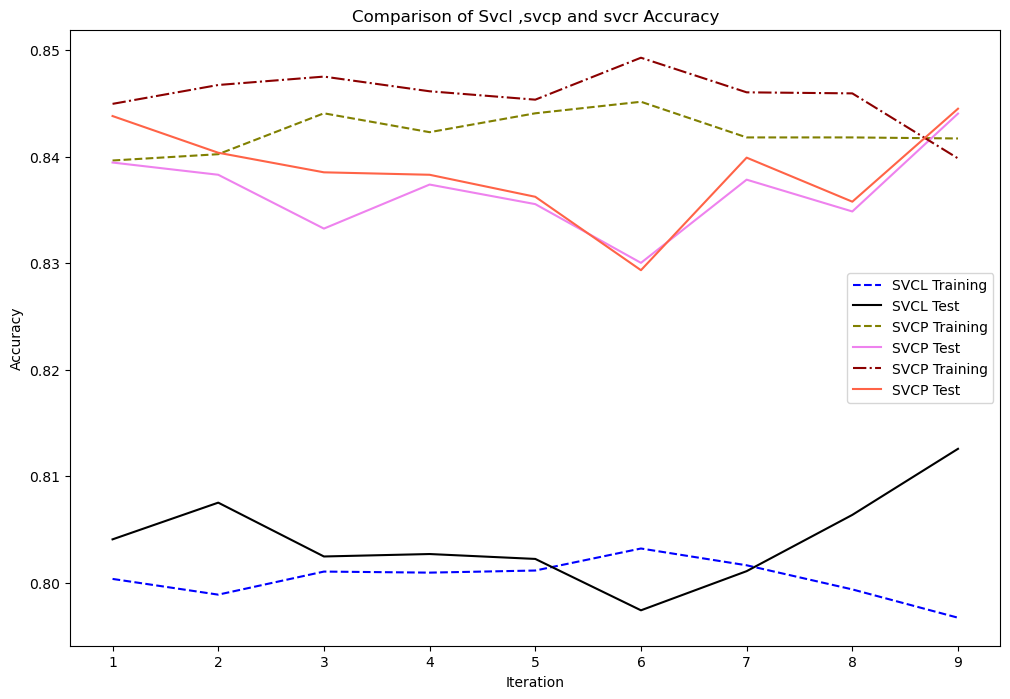

In [29]:
### -- Comparison of Svcl and svcp and svcr Accuracy
plt.figure(figsize=(12, 8))
# Support vector machine --Linear 
plt.plot(np.arange(1, 10), training_accuracy_svcl, label='SVCL Training', color='blue', linestyle='--')
plt.plot(np.arange(1, 10), test_accuracy_svcl, label='SVCL Test', color='black')
# Support vector machine --Poly 
plt.plot(np.arange(1, 10), training_accuracy_svcp, label='SVCP Training', color='olive', linestyle='--')
plt.plot(np.arange(1, 10), test_accuracy_svcp, label='SVCP Test', color='violet')
# Support vector machine -- RBF 
plt.plot(np.arange(1, 10), training_accuracy_svcr, label='SVCP Training', color='darkred', linestyle='-.')
plt.plot(np.arange(1, 10), test_accuracy_svcr, label='SVCP Test', color='tomato')

plt.title('Comparison of Svcl ,svcp and svcr Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

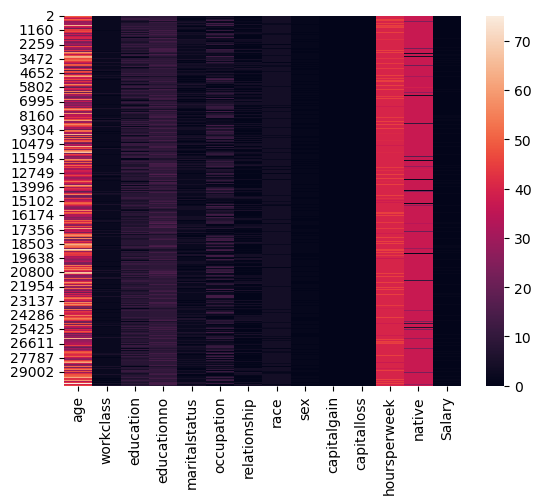

In [30]:
##---Heat-map
sns.heatmap(df)
plt.show()